In [1]:
import numpy as np
import scipy.fftpack as fftpack
import pylab as plt
import matplotlib as matplotlib

import pycuda.gpuarray as gpuarray

#-------------------------------------------------------------------------------------
from pywignercuda_path import SetPyWignerCUDA_Path
SetPyWignerCUDA_Path()
from GPU_WignerDiracKvN2D_4x4 import *

In [2]:
%matplotlib inline

In [3]:
class Klein(GPU_WignerDiracKvN2D_4x4):
    def __init__ (self):
    #....................Defining the geometry..................................... 
        X_gridDIM = 512
        P_gridDIM = 512
        
        X_amplitude = 14  
        P_amplitude = 14   

        
        timeSteps  =  800
        dt = 0.01 #dX/c
        
        skipFrames =   10

        #...................Defining the kinematic-dynamical constants.................
        
        mass = 1.
        c = 1.
        
        #self.dt = dX/self.c
        #...................Defining the potential and initial state parameters........
        V0 = 0.
        w  = 0.
        
        #.........................ODM damping ........................................
        self.gammaDamping = 0.0
        
        #............................................................................
        
        self.D_Theta      = 0.0
        self.D_Lambda     = 0.0
                
        #self.pX = 9.5
        self.Potential_0_String = '1.5*x'
        self.Potential_1_String = ' 0.*x'
        self.Potential_2_String = ' 0.*x'
        self.Potential_3_String = ' 0.*x'

        
        #.............................................................................
        GPU_WignerDiracKvN2D_4x4.__init__(self,
            X_gridDIM, P_gridDIM, X_amplitude, P_amplitude, mass, c, dt,
            timeSteps,skipFrames,frameSaveMode='Density',antiParticleNorm = True, computeEnergy=True)
        #.............................................................................
        
          
    def  Set_Initial_State  (self) :
 
        #..................Defining the output directory/file ........................

        self.fileName = '/home/rcabrera/DATA/DiracKvN2D_4x4/X1.hdf5'
        
        self.W_init = np.empty([4,4,instance.P_gridDIM,instance.X_gridDIM],dtype = np.complex128)
        
        init_x  = -1
        self.pX = 5
        s = 1.
        
        print ' v init = ', self.c * self.pX/np.sqrt( (self.mass*self.c)**2 + self.pX**2  )  #/ np.sqrt(   (self.mass*self,c)**2  + (self.pX)**2 )
        #
        
        psiL1 = self.GaussianSpinor_ParticleUp(  init_x , self.pX , s, self.X - 0.5*self.Theta )       
         
        psiR1 = self.GaussianSpinor_ParticleUp(  init_x , self.pX , s, self.X + 0.5*self.Theta )         

        #
        
        for i in range(4):
            for j in range(4):
                self.W_init[i,j][:,:] = psiL1[i]*psiR1[j].conj()
        
        # To XP       
        self.Fourier_4X4_Theta_To_P(self.W_init)
        
        instance.FilterElectrons( self.W_init , 1)
        
        norm = self.Wigner_4x4_Norm(self.W_init)
        self.W_init *= 1./ norm
        

In [4]:
instance = Klein()

  D_1_Potential_0 =  1.50000000000000 + 0.*x


/home/rcabrera/Documents/source/python/PyWignerCUDA/GPU_WignerDiracKvN2D_4x4.py:2053: UserWarning: The CUDA compiler succeeded, but said the following:
kernel.cu(23): warning: variable "p1" was declared but never referenced

kernel.cu(23): warning: variable "p1" was declared but never referenced


  SourceModule(CUDAsource_P_plus_Lambda%(self.CUDA_constants),arch="sm_20").get_function( "Kernel" )
/home/rcabrera/Documents/source/python/PyWignerCUDA/GPU_WignerDiracKvN2D_4x4.py:2057: UserWarning: The CUDA compiler succeeded, but said the following:
kernel.cu(22): warning: variable "p1" was declared but never referenced

kernel.cu(22): warning: variable "p1" was declared but never referenced


  SourceModule(CUDAsource_P_minus_Lambda%(self.CUDA_constants),arch="sm_20").get_function( "Kernel" )
/home/rcabrera/Documents/source/python/PyWignerCUDA/GPU_WignerDiracKvN2D_4x4.py:2085: UserWarning: The CUDA compiler succeeded, but said the following:
kernel.cu(36): warning: variable "j" was declar

In [5]:
(instance.mass)

1.0

In [6]:
instance.Set_Initial_State()

 v init =  0.980580675691


In [7]:

#instance.Set_Initial_State()

instance.Run ()

----------------------------------------------
 Relativistic Wigner-Dirac Propagator:  x-Px  
----------------------------------------------
 dt      =  0.01
 dx      =  0.0546875
 dp      =  0.0546875
 dLambda =  0.224399475256
            
         GPU memory Total        5.24945068359 GB
         GPU memory Free         4.67380142212 GB
 progress  0 %
 cuda grid =   ( (512, 1, 1)  ,  (512, 1, 1) )
 progress  1 %
 progress  2 %
 progress  3 %
 progress  4 %
 progress  6 %
 progress  7 %
 progress  8 %
 progress  9 %
 progress  11 %
 progress  12 %
 progress  13 %
 progress  14 %
 progress  16 %
 progress  17 %
 progress  18 %
 progress  19 %
 progress  21 %
 progress  22 %
 progress  23 %
 progress  24 %
 progress  26 %
 progress  27 %
 progress  28 %
 progress  29 %
 progress  31 %
 progress  32 %
 progress  33 %
 progress  34 %
 progress  36 %
 progress  37 %
 progress  38 %
 progress  39 %
 progress  41 %
 progress  42 %
 progress  43 %
 progress  44 %
 progress  46 %
 progress  4

In [8]:
def PlotWigner(W):
    
    W0 = fftpack.fftshift(instance.Wigner_4X4__SpinTrace( W ).real)
    
    x_min = -instance.X_amplitude
    x_max = instance.X_amplitude - instance.dX
    
    p_min = -instance.P_amplitude
    p_max = instance.P_amplitude - instance.dP
    
    global_max = 0.31          #  Maximum value used to select the color range
    global_min = -0.27        # 

    print 'min = ', np.min( W0 ), ' max = ', np.max( W0 )
    print 'normalization = ', np.sum( W0 )*instance.dX*instance.dP

    zero_position =  abs( global_min) / (abs( global_max) + abs(global_min)) 
    wigner_cdict = {'red' 	: 	((0., 0., 0.),
							(zero_position, 1., 1.), 
							(1., 1., 1.)),
					'green' :	((0., 0., 0.),
							(zero_position, 1., 1.),
							(1., 0., 0.)),
					'blue'	:	((0., 1., 1.),
							(zero_position, 1., 1.),
							(1., 0., 0.)) }
    wigner_cmap = matplotlib.colors.LinearSegmentedColormap('wigner_colormap', wigner_cdict, 256)
    #wigner_cmap = plt.colors.LinearSegmentedColormap('wigner_colormap', wigner_cdict, 256)
    

    fig, ax = plt.subplots(figsize=(20, 7))

    
        
    cax = ax.imshow( W0 ,origin='lower',interpolation='nearest',\
    extent=[x_min, x_max, p_min, p_max], vmin= global_min, vmax=global_max, cmap=wigner_cmap)

    ax.set_xlabel('x')
    ax.set_ylabel('p')
    #ax.set_xlim((x_min,x_max))
    #ax.set_ylim((-5 , p_max/3.5))
    #ax.set_ylim((-16,16))    
    ax.set_aspect(1)
    ax.grid('on')

In [9]:
def PlotMarginal_P(instance):
    
    W_0 = fftpack.fftshift( instance.Wigner_4X4__SpinTrace(instance.W_init).real )
        
    print ' norm =  ', np.sum(W_0).real*instance.dX*instance.dP
    
    fig, ax = plt.subplots(figsize=(10, 5))

    prob_P = np.sum(W_0,axis=1)*instance.dX
    ax.plot(instance.P_range, prob_P , label = 'init')
    
    W_0 = fftpack.fftshift(  instance.Wigner_4X4__SpinTrace(instance.W_end).real )
    
    print ' norm =  ', np.sum(W_0).real*instance.dX*instance.dP
    
    prob_P = np.sum(W_0,axis=1)*instance.dX
    ax.plot(instance.P_range, prob_P , label = 'final')
    
    ax.set_xlim(-18,18)
    ax.set_xlabel('p')
    ax.set_ylabel('Prob')
    ax.grid('on')
    
    ax.legend(bbox_to_anchor=(0.75, 0.5), loc=2, prop={'size':22})
    
def PlotMarginal_X(instance):
    
    W_0 = fftpack.fftshift( instance.Wigner_4X4__SpinTrace(instance.W_init).real )
        
    
    fig, ax = plt.subplots(figsize=(10, 5))

    prob_X = np.sum(W_0,axis=0)*instance.dP
    ax.plot(instance.X_range, prob_X , label = 'init')
    
    W_0 = fftpack.fftshift( instance.Wigner_4X4__SpinTrace(instance.W_end).real )
    
    
    prob_X = np.sum(W_0,axis=0)*instance.dP
    ax.plot(instance.X_range, prob_X , label = 'final')
    
    ax.set_xlabel('x')
    ax.set_ylabel('Prob')
    ax.grid('on')
    
    ax.legend(bbox_to_anchor=(0.75, 0.5), loc=2, prop={'size':22})

min =  -8.55763603493e-09  max =  3.17920519628
normalization =  10.0


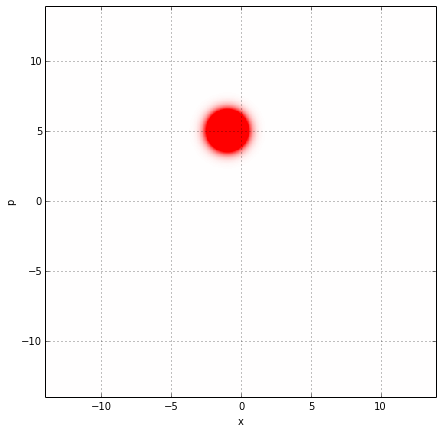

In [10]:
PlotWigner(10*instance.W_init)

min =  -7.04369343969e-09  max =  3.15212339853
normalization =  10.0
 time =  8.0


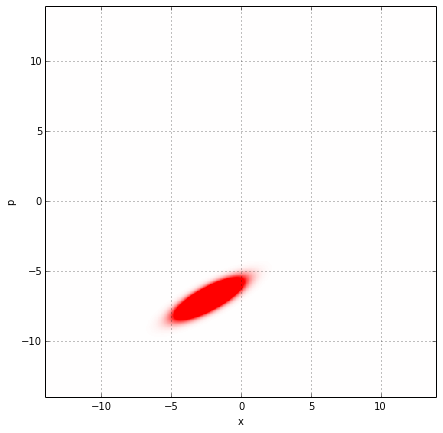

In [11]:
PlotWigner( 10*instance.W_end )
print ' time = ', instance.timeRange[-1]

 norm =   1.0
 norm =   1.0


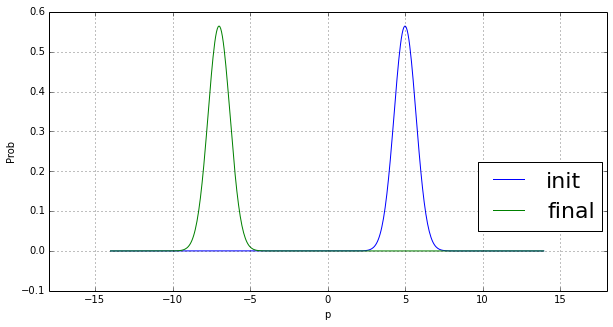

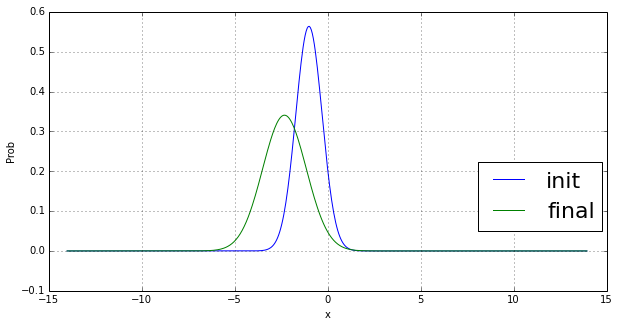

In [12]:
PlotMarginal_P( instance )
PlotMarginal_X( instance )

In [13]:
WendFilter = instance.W_end.copy()
instance.FilterElectrons( WendFilter , 1)

min =  -7.03953944625e-09  max =  3.15162663373
normalization =  10.0


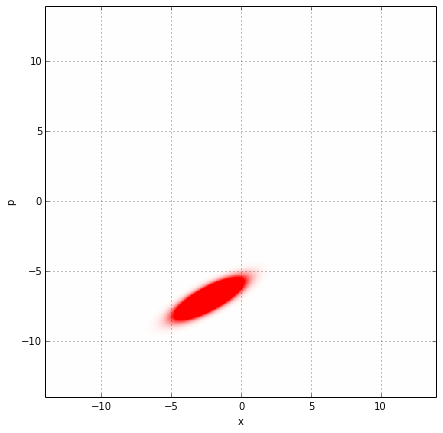

In [14]:
PlotWigner( 10*WendFilter )

## Ehrenfest Theorems

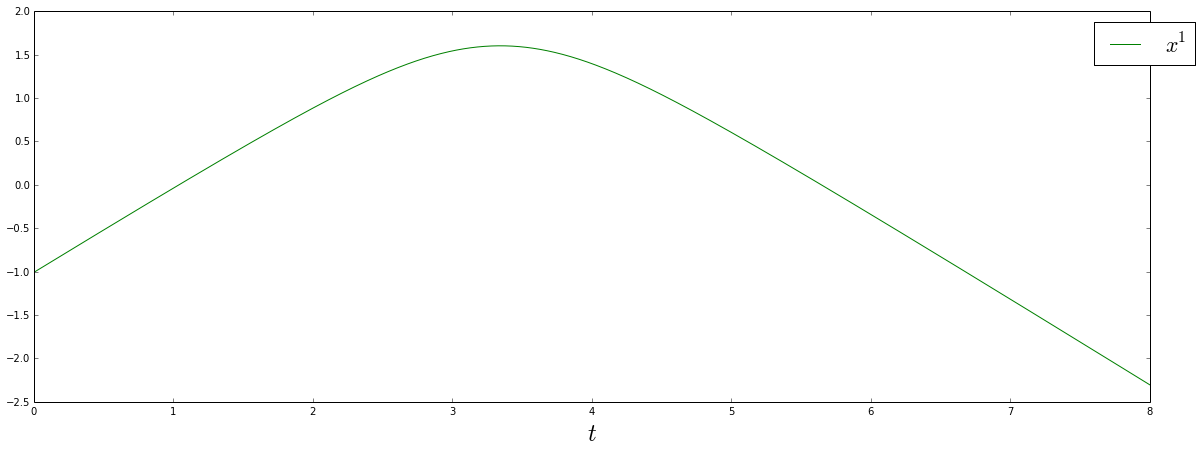

In [15]:
axis_font = {'size':'24'}


fig, ax = plt.subplots(figsize=(20, 7))
ax.plot( instance.timeRange[1:] ,   instance.X_Average.real  , 'g',
        label= '$ x^1 $')


ax.set_xlabel(r'$t$',**axis_font)

ax.legend(bbox_to_anchor=(1.05, 1), loc=1, prop={'size':22})

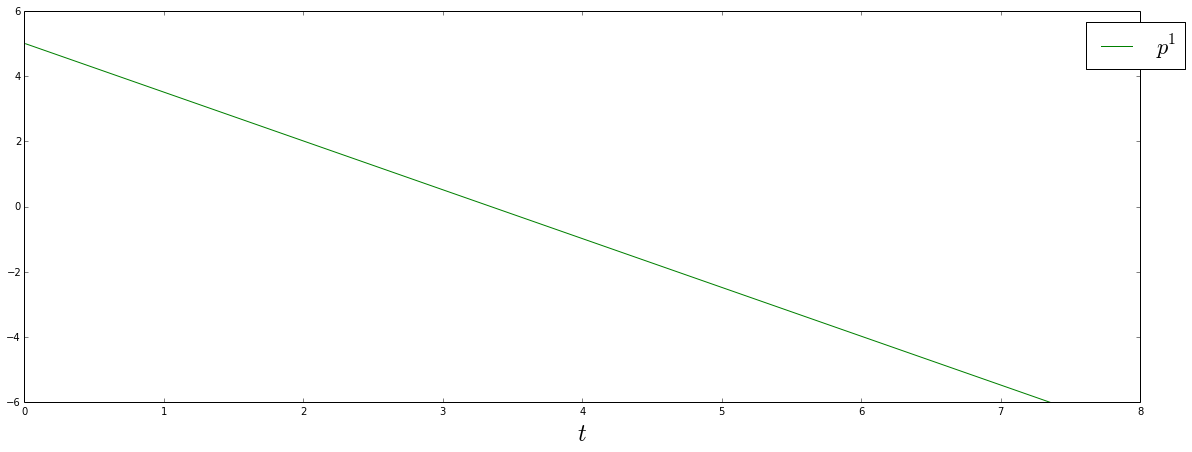

In [16]:
axis_font = {'size':'24'}

fig, ax = plt.subplots(figsize=(20, 7))
ax.plot( instance.timeRange[1:] ,   instance.P_Average.real  , 'g',
        label= '$ p^1 $')

ax.set_ylim(-6, 6)

ax.set_xlabel(r'$t$',**axis_font)

ax.legend(bbox_to_anchor=(1.05, 1), loc=1, prop={'size':22})

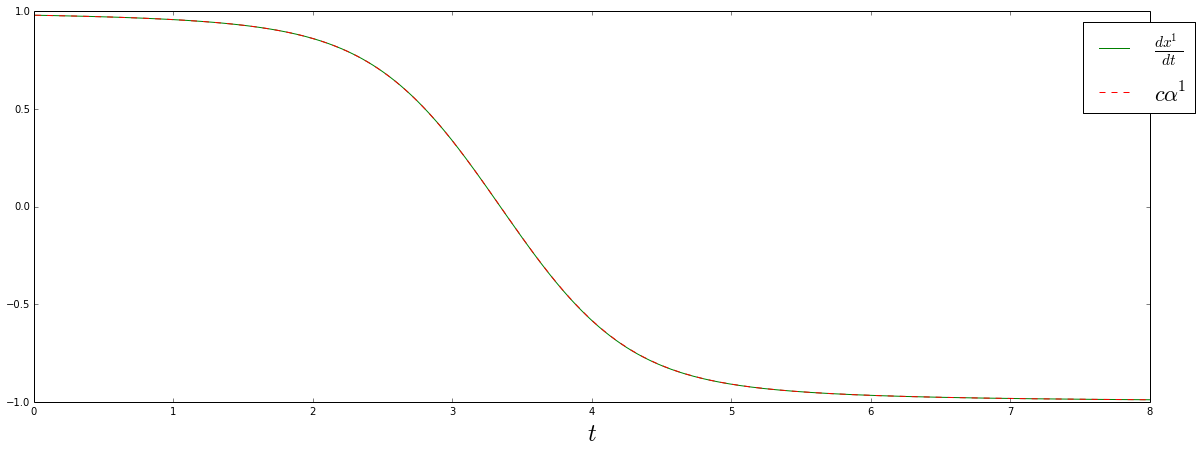

In [17]:
axis_font = {'size':'24'}


fig, ax = plt.subplots(figsize=(20, 7))
ax.plot( instance.timeRange[1:] ,  np.gradient( instance.X_Average.real , instance.dt)  , 'g',
        label= '$\\frac{dx^1}{dt} $')

ax.plot( instance.timeRange[1:] ,  instance.Alpha_1_Average.real ,'r--' ,label='$c \\alpha^1$')

ax.set_ylim(-1, 1)

ax.set_xlabel(r'$t$',**axis_font)

ax.legend(bbox_to_anchor=(1.05, 1), loc=1, prop={'size':22})

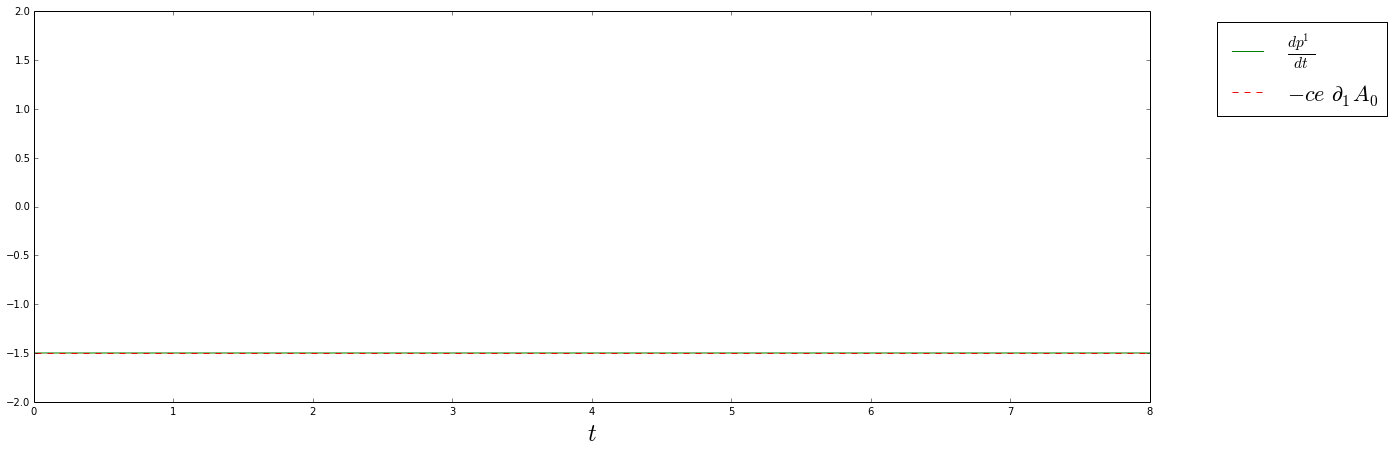

In [18]:
axis_font = {'size':'24'}


fig, ax = plt.subplots(figsize=(20, 7))
ax.plot( instance.timeRange[1:] ,  np.gradient( instance.P_Average.real , instance.dt)  , 'g',
        label= '$\\frac{dp^1}{dt} $')

ax.plot( instance.timeRange[1:] , 
        -instance.D_1_Potential_0_Average.real - 2.*instance.mass*instance.gammaDamping*instance.Alpha_1_Average.real ,'r--' ,label='$-c e\, \\partial_1 A_0  $')


ax.set_ylim(-2, 2)


ax.set_xlabel(r'$t$',**axis_font)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, prop={'size':22})

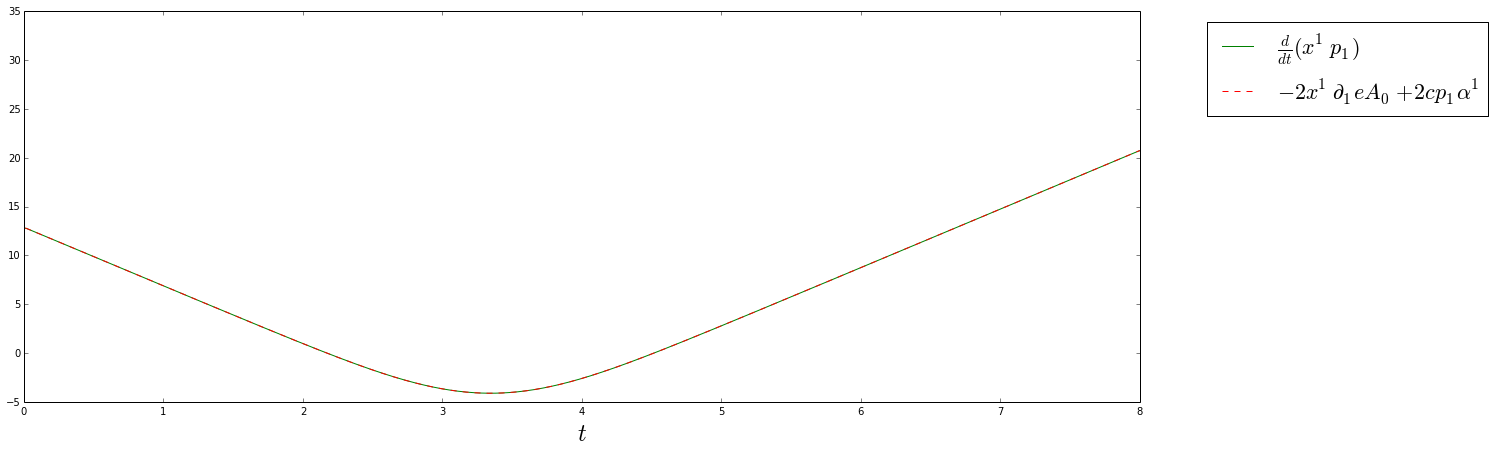

In [19]:
axis_font = {'size':'24'}

fig, ax = plt.subplots(figsize=(20, 7))
ax.plot( instance.timeRange[1:] ,
        2*np.gradient( instance.XP_Average.real , instance.dt)  , 'g',
        label= '$\\frac{d}{dt}( x^1 p_1 ) $')

ax.plot( instance.timeRange[1:] ,
        -2*instance.X1_D_1_Potential_0_Average.real + 2*instance.c*instance.P1_Alpha_1_Average.real -4.*instance.mass*instance.gammaDamping*instance.X1_Alpha_1_Average,
        'r--' ,label='$-2 x^1 \\partial_1 e A_0  + 2 c p_1 \\alpha^1$')

ax.set_ylim(-5, 35)

ax.set_xlabel(r'$t$',**axis_font)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, prop={'size':22})

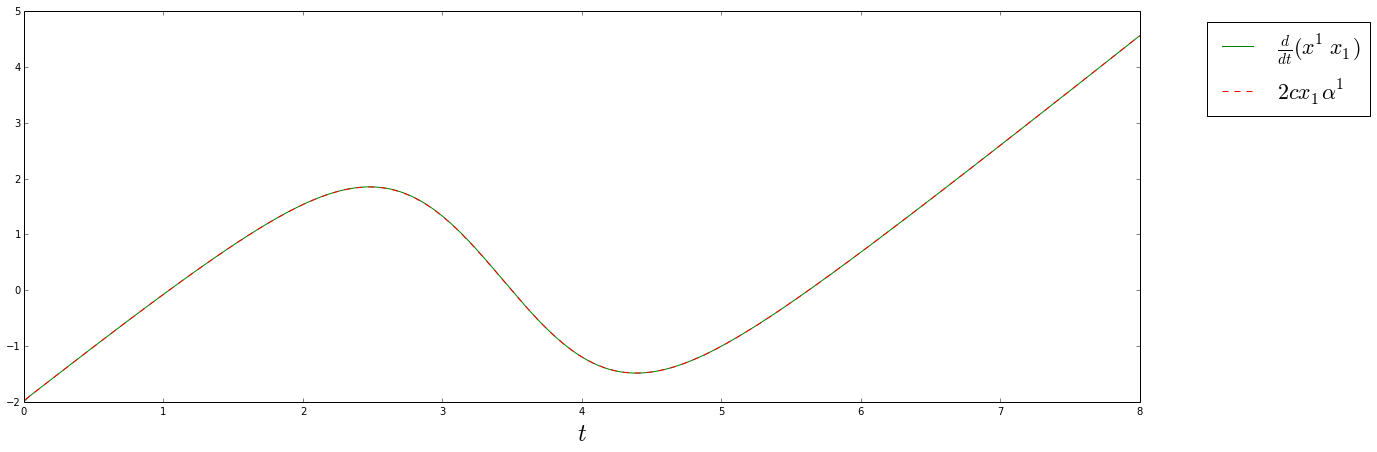

In [20]:
axis_font = {'size':'24'}

fig, ax = plt.subplots(figsize=(20, 7))
ax.plot( instance.timeRange[1:] ,
        np.gradient( instance.XX_Average.real , instance.dt)  , 'g',
        label= '$\\frac{d}{dt}( x^1 x_1 ) $')

ax.plot( instance.timeRange[1:] ,
      2*instance.c*instance.X1_Alpha_1_Average.real,
        'r--' ,label='$2 c x_1 \\alpha^1$')


ax.set_xlabel(r'$t$',**axis_font)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, prop={'size':22})

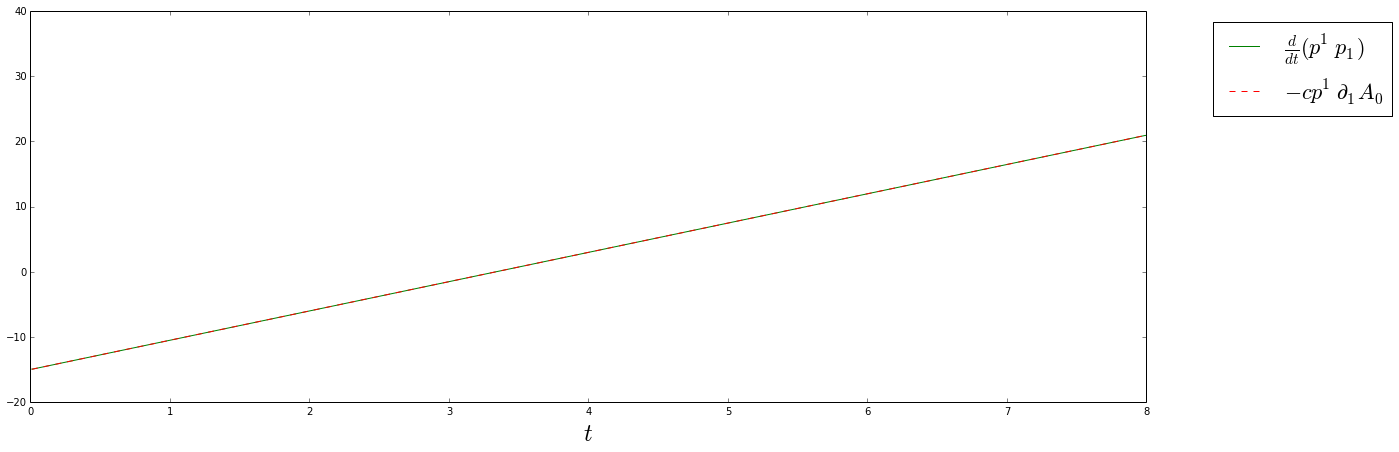

In [21]:
axis_font = {'size':'24'}

fig, ax = plt.subplots(figsize=(20, 7))
ax.plot( instance.timeRange[1:] ,
        np.gradient( instance.PP_Average.real , instance.dt)  , 'g',
        label= '$\\frac{d}{dt}( p^1 p_1 ) $')

ax.plot( instance.timeRange[1:] ,
       -2*instance.P1_D_1_Potential_0_Average.real - \
       4.*instance.mass*instance.gammaDamping*instance.P1_Alpha_1_Average.real,
       'r--' ,label='$- c p^1 \\partial_1 A_0 $')

ax.set_ylim(-20, 40)

ax.set_xlabel(r'$t$',**axis_font)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, prop={'size':22})

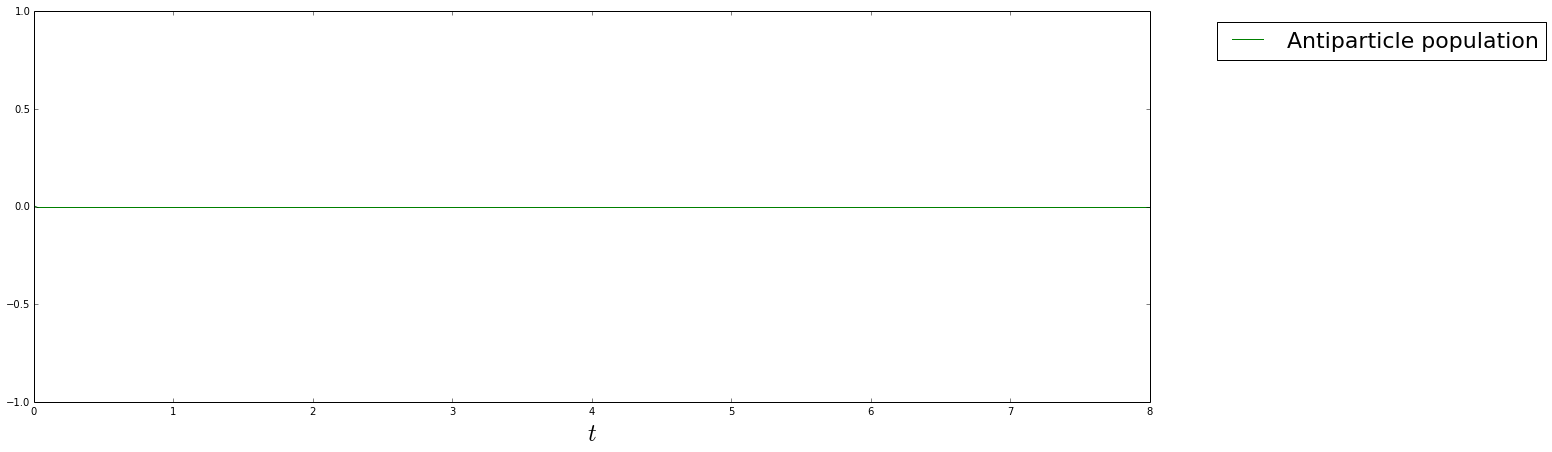

In [22]:
axis_font = {'size':'24'}

fig, ax = plt.subplots(figsize=(20, 7))
ax.plot( instance.timeRange[1:] ,
        instance.antiParticle_population.real  , 'g',
        label= 'Antiparticle population')

ax.set_ylim(-1, 1)

ax.set_xlabel(r'$t$',**axis_font)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, prop={'size':22})

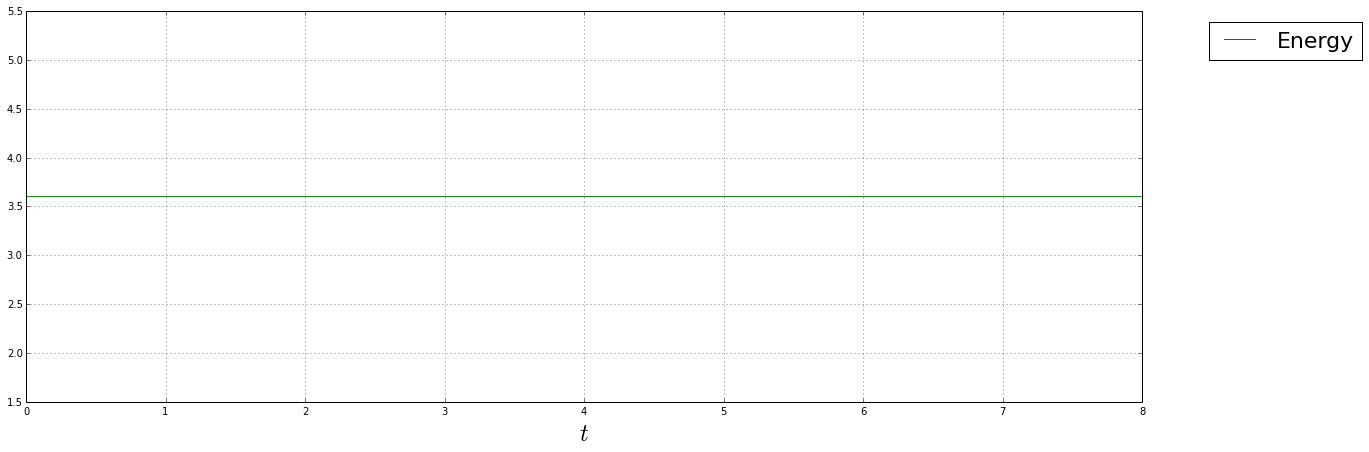

In [23]:
axis_font = {'size':'24'}

fig, ax = plt.subplots(figsize=(20, 7))
ax.plot( instance.timeRange[1:] ,
        instance.Dirac_energy.real  , 'g',
        label= 'Energy')

ax.set_ylim(1.5, 5.5)
ax.set_xlabel(r'$t$',**axis_font)
ax.grid('on')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, prop={'size':22})

In [24]:
import antigravity

In [25]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
